# Problem Statement - Classify financial consumer complaints using NLTK

We need to classify the dataset comprising of Consumer Complaints on Financial products, into the below listed categories.  This would enable the banking/financial institutions to quickly identify and provide customized solutions to each customer, based on complaints received department wise. 

The  dataset is available on kaggle and the product can belong to any of these categories: 
- Debt collection, 
- Consumer Loan, 
- Mortgage, 
- Credit card, 
- Credit reporting, 
- Student loan,
- Bank account or service, 
- Payday loan,
- Money transfers,
- Other financial service,
- Prepaid card.


# Main Concepts of Natural Language Processing

Natural Language Processing (NLP) is a process of manipulating or understanding the text or speech by any software or machine. An analogy is that humans interact and understand each other’s views and respond with the appropriate answer. In NLP, this interaction, understanding, and response are made by a computer instead of a human.

NLTK (Natural Language Toolkit) Library is a suite that contains libraries and programs for statistical language processing. It is one of the most powerful NLP libraries, which contains packages to make machines understand human language and reply to it with an appropriate response.

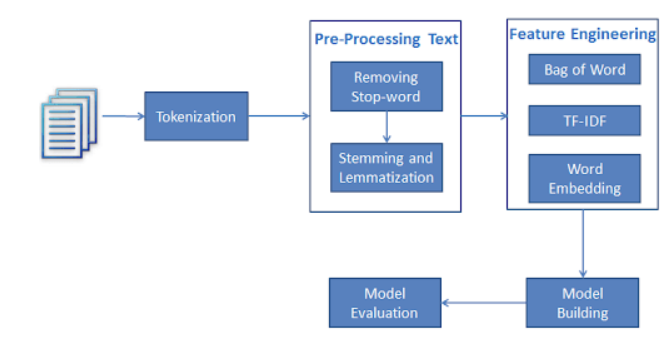

- Tokenization - 
  - The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph. A word (Token) is the minimal unit that a machine can undePOS tagging algorithms can predict the POS of the given word with a higher degree of precision.rstand and process. 
    - Sentence Tokenization: Sentence tokenizer breaks text paragraph into sentences. nltk.tokenize.sent_tokenize is used for this purpose.
    - Word Tokenization: Word tokenizer breaks text paragraph into words. nltk.tokenize.word_tokenize is used for this purpose.
    
- Stopwords Removal
  - Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.We would not want these words taking up space in our database, or taking up valuable processing time. nltk.corpus.stopwords is used to remove these.
  
- Part of speech tagging
  - POS tagging algorithms can predict the POS of the given word with a higher degree of precision. The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.  We can perform POS tags by using nltk.pos_tag.

- Stemming and Lemmatization
  - Lemmatization is the process of converting a word to its base form, ie it transforms root word with the use of vocabulary and morphological analysis. Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes.The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. We can perform lemmatization using Wordnetlemmatizer and stemming by using PorterStemmer. There are several more libraries available. 

- Named Entity Recognition
  - Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With named entity recognition, you can find the named entities in your texts and also determine what kind of named entity they are. We can use nltk.ne_chunk() to recognize named entities.
- Frequency Distribution
  - With a frequency distribution, you can check which words show up most frequently in your text. nltk.FreqDist can be used.

- TF-IDF
  - TF-IDF is the importance of a term is inversely related to its frequency across documents.TF gives us information on how often a term appears in a document and IDF gives us information about the relative rarity of a term in the collection of documents.
  - In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.DF(Inverse Document Frequency) measures the amount of information a given word provides across the document. IDF is the logarithmically scaled inverse ratio of the number of documents that contain the word and the total number of documents.
                        idf(W) = log(#(documents)/#(documents containing word W)
 
  - TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix. It is the product of TF and IDF. Word with high tf-idf in a document, it is most of the times occurred in given documents and must be absent in the other documents. So the words must be a signature word.
  - It can be used to vectorize text into a format more agreeable for ML & NLP techniques.

- A few other vectorizing algorithms:
    - Bag-of-words model(BoW ) 
      - It is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document. We can create a matrix of document and words by counting the occurrence of words in the given document. This matrix is known as Document-Term Matrix(DTM). This matrix is using a single word. It can be a combination of two or more words, which is called a bigram or trigram model and the general approach is called the n-gram model. We can generate document term matrix by using scikit-learn's CountVectorizer.  
    - Word2Vec
      - It is an algorithm that uses shallow 2-layer, not deep, neural networks to ingest a corpus and produce sets of vectors. Some key differences between TF-IDF and word2vec is that TF-IDF is a statistical measure that we can apply to terms in a document and then use that to form a vector whereas word2vec will produce a vector for a term and then more work may need to be done to convert that set of vectors into a singular vector or other format. Additionally TF-IDF does not take into consideration the context of the words in the corpus whereas word2vec does.
    - BERT(Bidirectional Encoder Representations from Transformers)
      - BERT is an ML/NLP technique developed by Google that uses a transformer based ML model to  convert phrases, words, etc into vectors. Key differences between TF-IDF and BERT are as follows: TF-IDF does not take into account the semantic meaning or context of the words whereas BERT does. Also BERT uses deep neural networks as part of its architecture, meaning that it can be much more computationally expensive than TF-IDF which has no such requirements. 

## Import Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import os
from nltk import word_tokenize, FreqDist
import plotly
import plotly.graph_objects as go
import plotly.express as px

## Load the data 

In [2]:
df = pd.read_csv('Consumer_Complaints.csv', encoding='latin-1')
df.head()


Date received           Product     Sub-product  \
0    03-12-2014          Mortgage  Other mortgage   
1    10-01-2016  Credit reporting             NaN   
2    10/17/2016     Consumer Loan    Vehicle loan   
3    06-08-2014       Credit card             NaN   
4    09/13/2014   Debt collection     Credit card   

                                      Issue                   Sub-issue  \
0  Loan modification,collection,foreclosure                         NaN   
1    Incorrect information on credit report              Account status   
2                Managing the loan or lease                         NaN   
3                                Bankruptcy                         NaN   
4                     Communication tactics  Frequent or repeated calls   

                                  Consumer Complaint  \
0                                                NaN   
1  I have outdated information on my credit repor...   
2  I purchased a new car on XXXX XXXX. The car de...   
3                                                NaN   
4                                                NaN   

                             Company Public Response  \
0                                                NaN   
1  Company has responded to the consumer and the ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                  Company State ZIP code            Tags  \
0                    M&T BANK CORPORATION    MI    48382             NaN   
1  TRANSUNION INTERMEDIATE HOLDINGS, INC.    AL    352XX             NaN   
2          CITIZENS FINANCIAL GROUP, INC.    PA    177XX  Older American   
3                AMERICAN EXPRESS COMPANY    ID    83854  Older American   
4                          CITIBANK, N.A.    VA    23233             NaN   

  Consumer consent provided? Submitted via Date Sent to Company  \
0                        NaN      Referral           03/17/2014   
1           Consent provided           Web           10-05-2016   
2           Consent provided           Web           10/20/2016   
3                        NaN           Web           06-10-2014   
4                        NaN           Web           09/13/2014   

  Company Response to Consumer Timely response? Consumer disputed?  \
0      Closed with explanation              Yes                 No   
1      Closed with explanation              Yes                 No   
2      Closed with explanation              Yes                 No   
3      Closed with explanation              Yes                Yes   
4      Closed with explanation              Yes                Yes   

   Complaint ID  Unnamed: 18  
0        759217          NaN  
1       2141773          NaN  
2       2163100          NaN  
3        885638          NaN  
4       1027760          NaN

## Exploratory Data Analysis

In [3]:
df.head(1)

Date received   Product     Sub-product  \
0    03-12-2014  Mortgage  Other mortgage   

                                      Issue Sub-issue Consumer Complaint  \
0  Loan modification,collection,foreclosure       NaN                NaN   

  Company Public Response               Company State ZIP code Tags  \
0                     NaN  M&T BANK CORPORATION    MI    48382  NaN   

  Consumer consent provided? Submitted via Date Sent to Company  \
0                        NaN      Referral           03/17/2014   

  Company Response to Consumer Timely response? Consumer disputed?  \
0      Closed with explanation              Yes                 No   

   Complaint ID  Unnamed: 18  
0        759217          NaN

In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

In [5]:
#choose the relevant columns
col = ['Product', 'Consumer Complaint']
df = df[col]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 2 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Product             1025010 non-null  object
 1   Consumer Complaint  277814 non-null   object
dtypes: object(2)
memory usage: 15.6+ MB


In [7]:
df.describe()

Product                                 Consumer Complaint
count    1025010                                             277814
unique        18                                             268391
top     Mortgage  There are many mistakes appear in my report wi...
freq      254165                                                495

In [8]:
df.isnull().sum()

Product                    0
Consumer Complaint    747196
dtype: int64

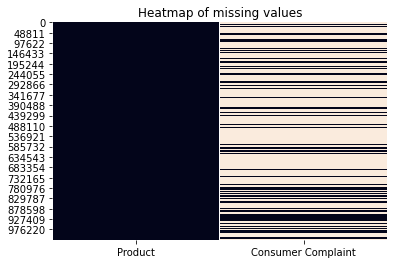

In [9]:
#missing heat map
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of missing values')
plt.show()

In [10]:
#remove na from Consumer Complaint 
df = df[pd.notnull(df['Consumer Complaint'])]

In [11]:
#dd Category_id from product column by converting into numerical representation
df['Category_id'] = df['Product'].factorize()[0]
df.head()

Product                                 Consumer Complaint  \
1   Credit reporting  I have outdated information on my credit repor...   
2      Consumer Loan  I purchased a new car on XXXX XXXX. The car de...   
7   Credit reporting  An account on my credit report has a mistaken ...   
12   Debt collection  This company refuses to provide me verificatio...   
16   Debt collection  This complaint is in regards to Square Two Fin...   

    Category_id  
1             0  
2             1  
7             0  
12            2  
16            2

In [12]:
#add length of Consumer Complaint as a column
df['Length of Complaint'] = df['Consumer Complaint'].apply(len)
df.head(5)

Product                                 Consumer Complaint  \
1   Credit reporting  I have outdated information on my credit repor...   
2      Consumer Loan  I purchased a new car on XXXX XXXX. The car de...   
7   Credit reporting  An account on my credit report has a mistaken ...   
12   Debt collection  This company refuses to provide me verificatio...   
16   Debt collection  This complaint is in regards to Square Two Fin...   

    Category_id  Length of Complaint  
1             0                  200  
2             1                 2042  
7             0                 1165  
12            2                  136  
16            2                 1796

## Visualization

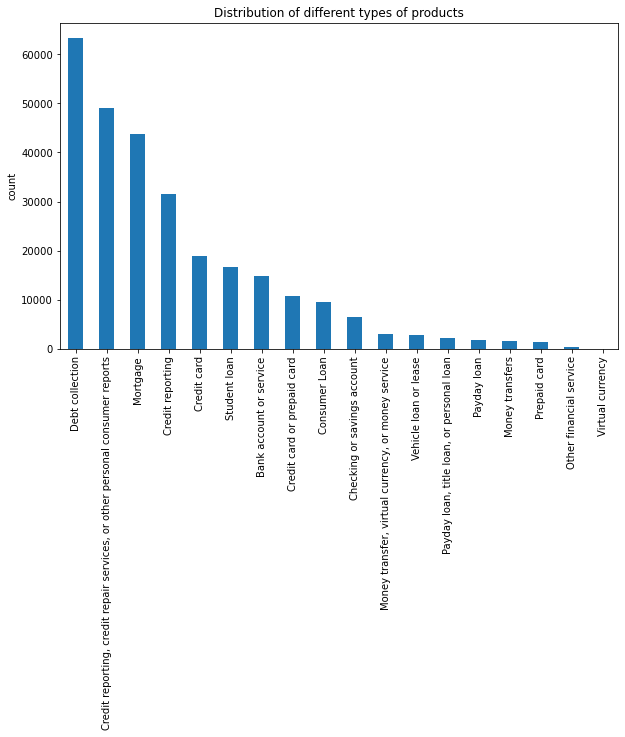

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
df['Product'].value_counts().plot(kind='bar')
plt.ylabel('count')
plt.title('Distribution of different types of products')
plt.show()


Heaviest complaints were in the Debt collection and Credit reporting. 

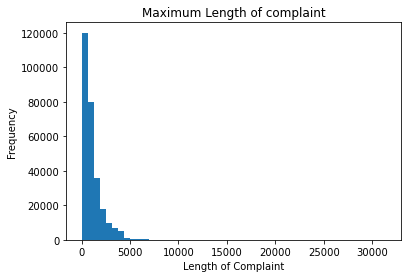

In [14]:
df['Length of Complaint'].plot(kind='hist',bins=50)
plt.xlabel('Length of Complaint')
plt.title('Maximum Length of complaint')
plt.show()

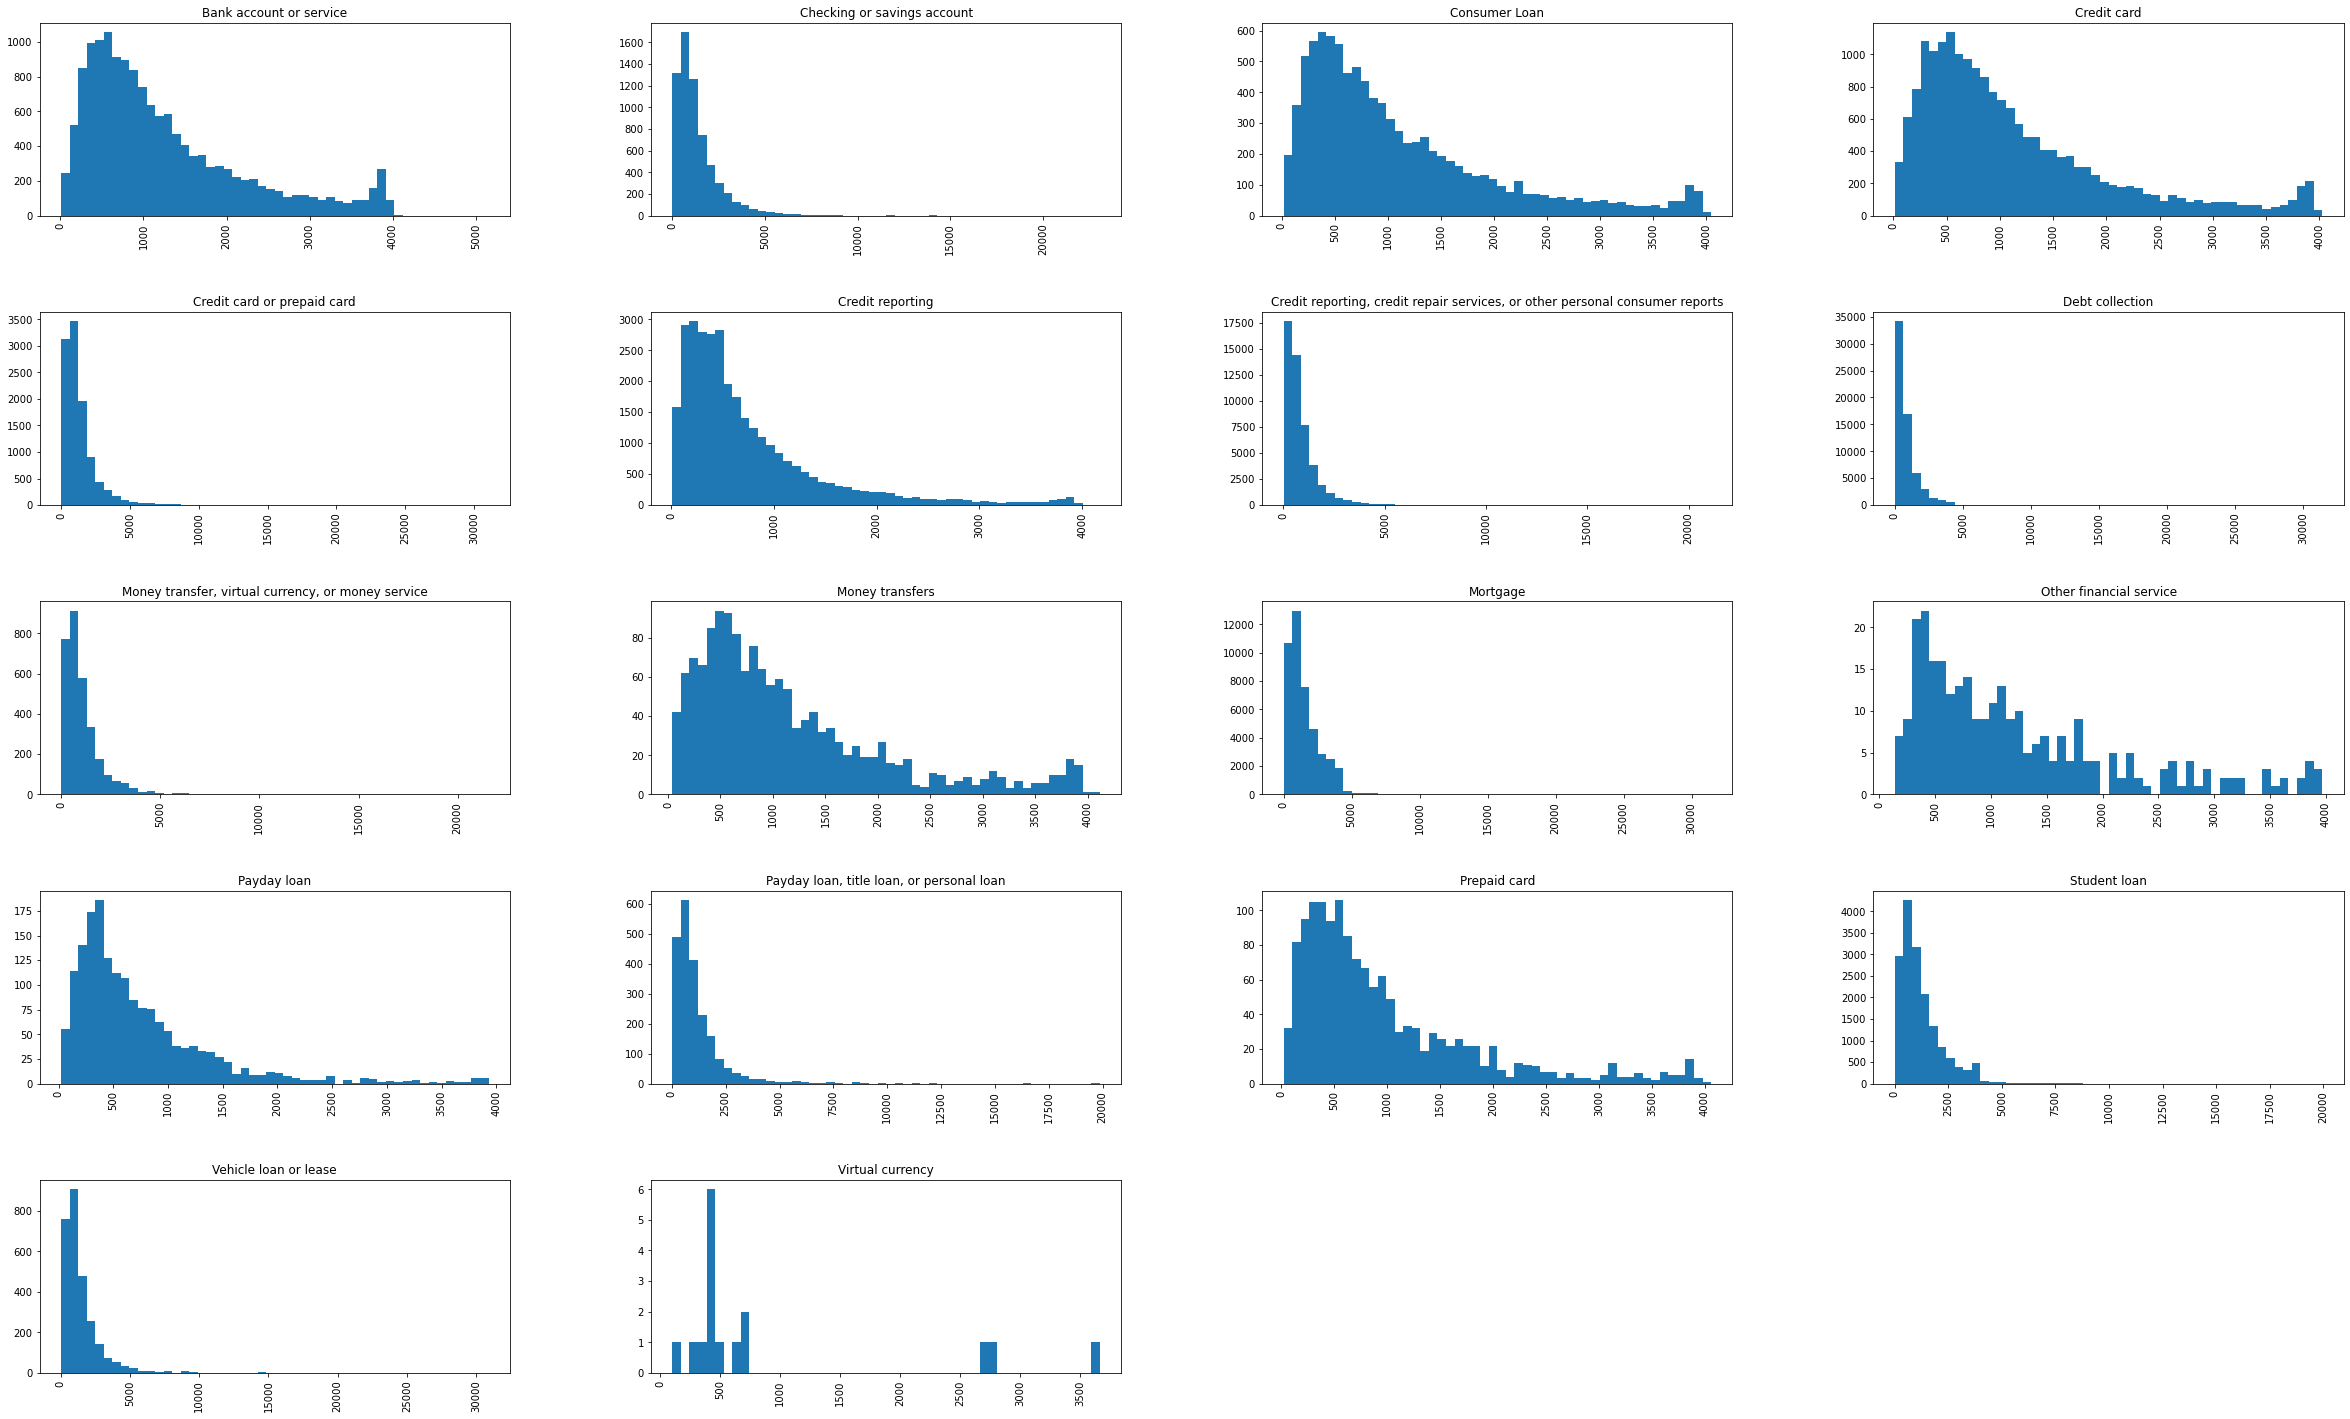

In [15]:
df.hist(column='Length of Complaint', by='Product', bins=50,figsize=(40,25))
plt.show()

## Pre-process the data

In [16]:
#The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. 
#Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context.
#POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.
from nltk.corpus import wordnet
def get_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

This function returns the wordnet object value corresponding to the POS tag.

In [17]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

This function performs several transformations:

- lowers the text
- tokenizes the text (split the text into words) and remove the punctuation
- remove words that contain numbers
- remove stop words like 'the', 'a' ,'this' etc.
- Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
- lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [18]:
df['Consumer Complaint']= df['Consumer Complaint'].apply(lambda x: preprocess_text(x))
df.head(2)

Product                                 Consumer Complaint  \
1  Credit reporting  outdated information credit report previously ...   
2     Consumer Loan  purchase new car xxxx xxxx car dealer call cit...   

   Category_id  Length of Complaint  
1            0                  200  
2            1                 2042

### Generate the word cloud

Credit reporting


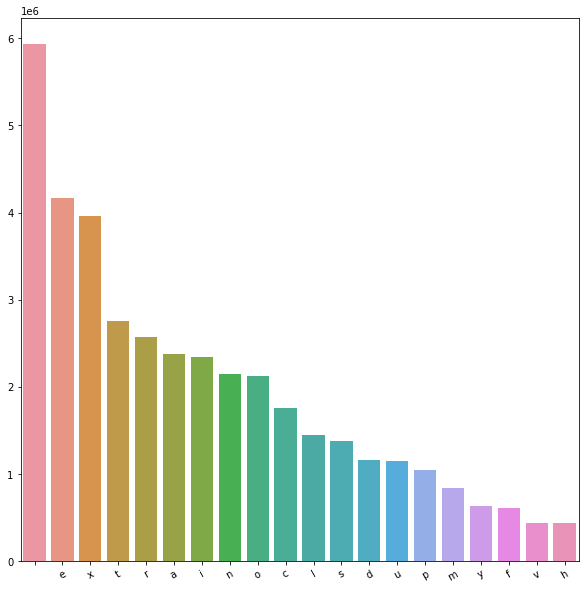

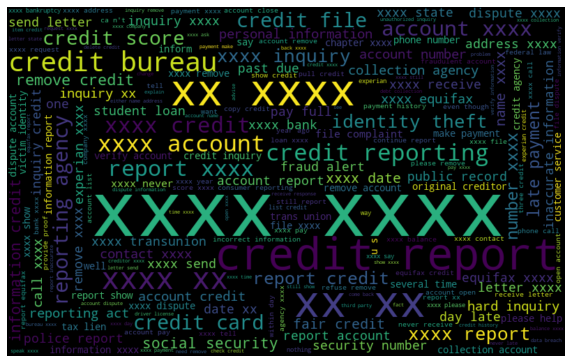

Consumer Loan


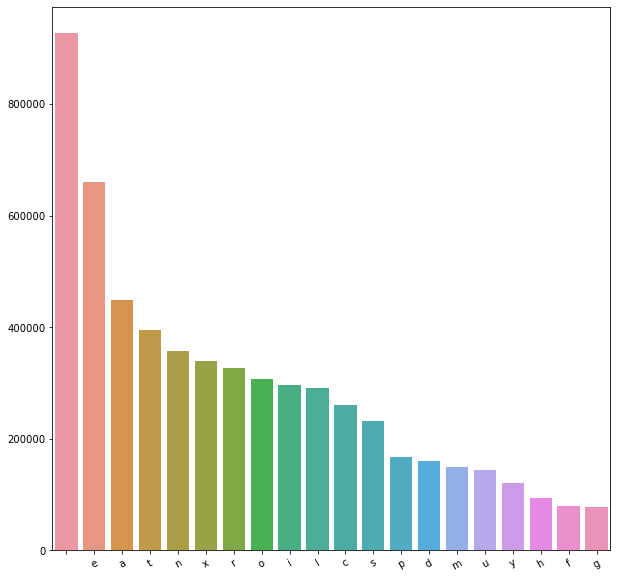

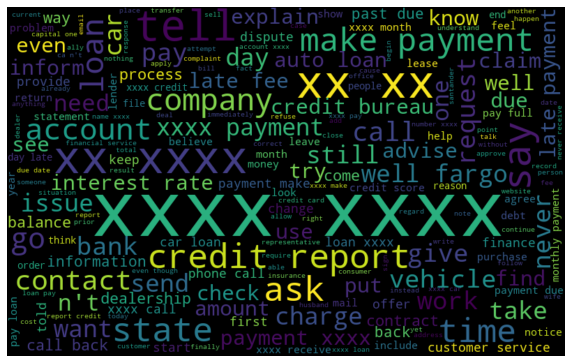

Debt collection


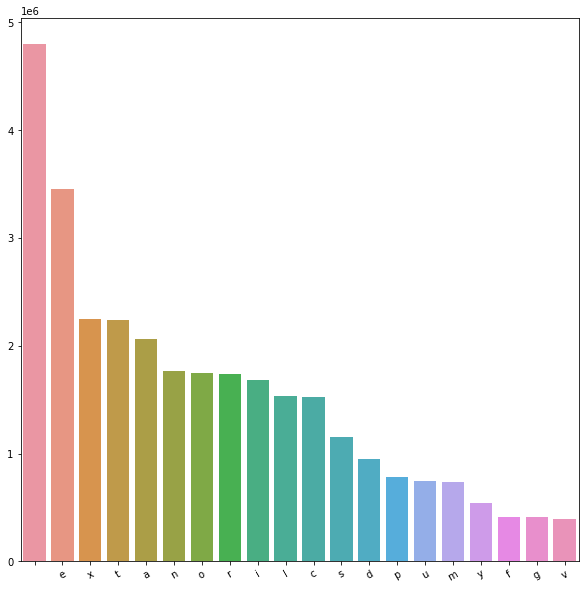

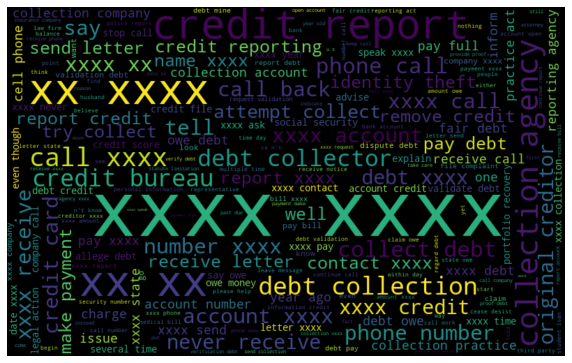

Mortgage


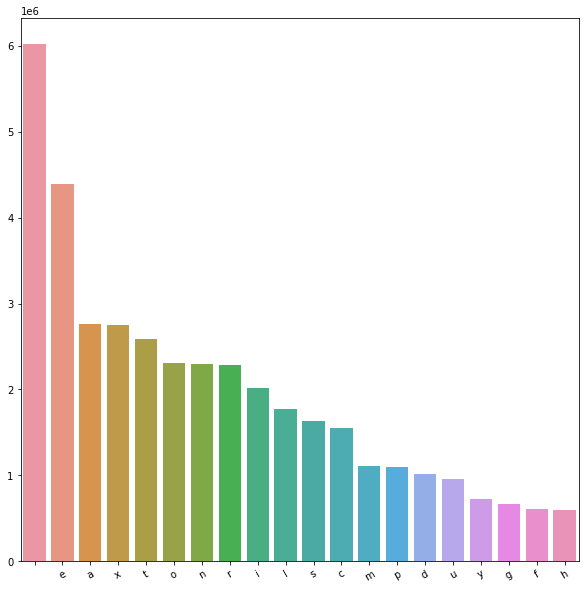

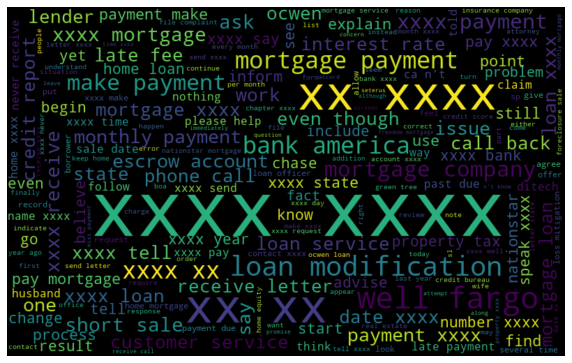

Credit card


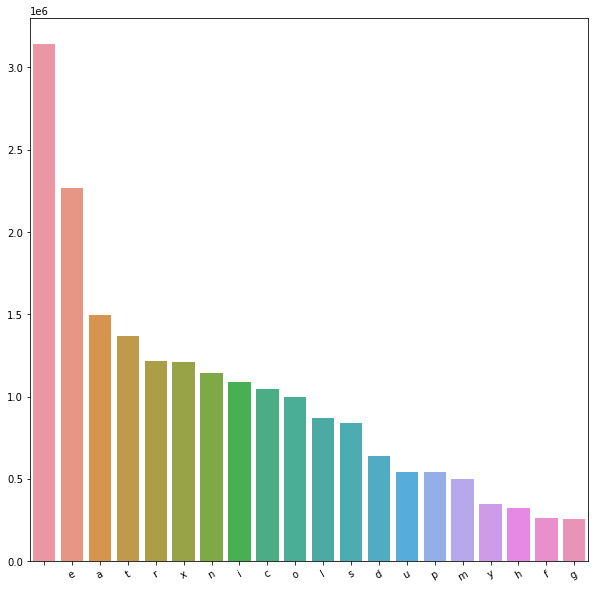

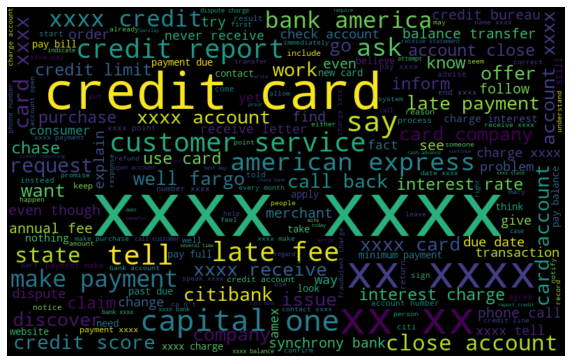

Other financial service


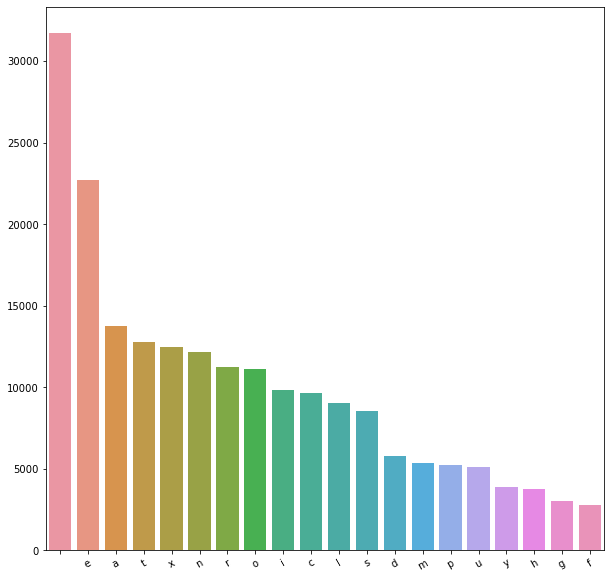

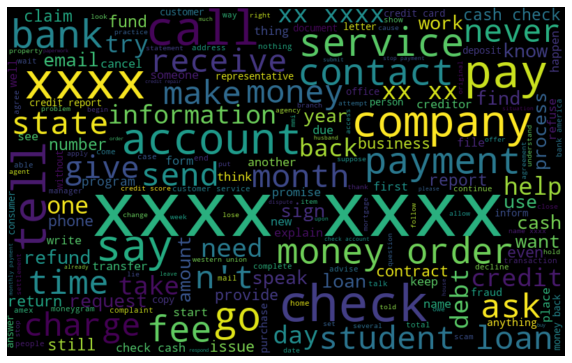

Bank account or service


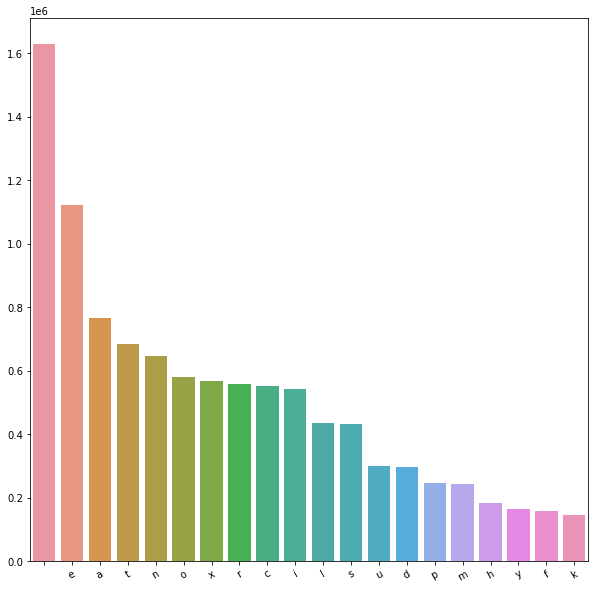

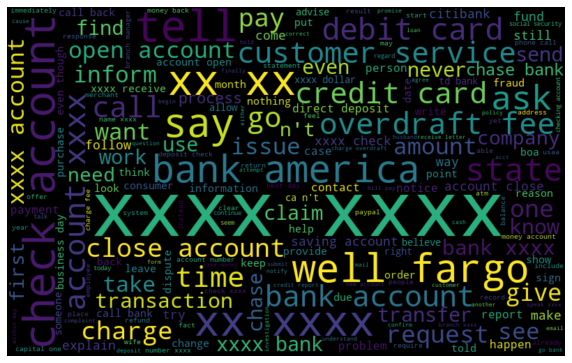

Student loan


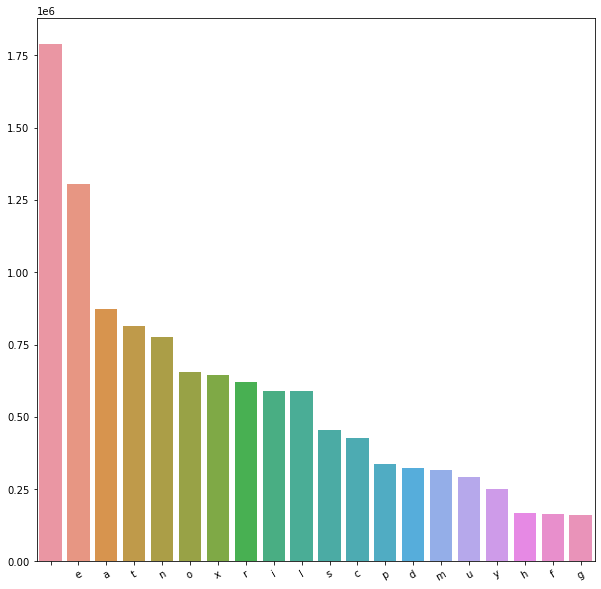

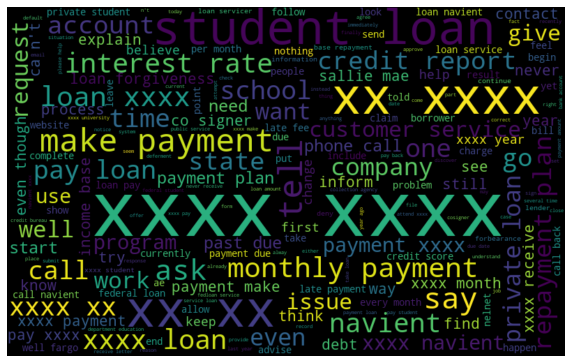

Money transfers


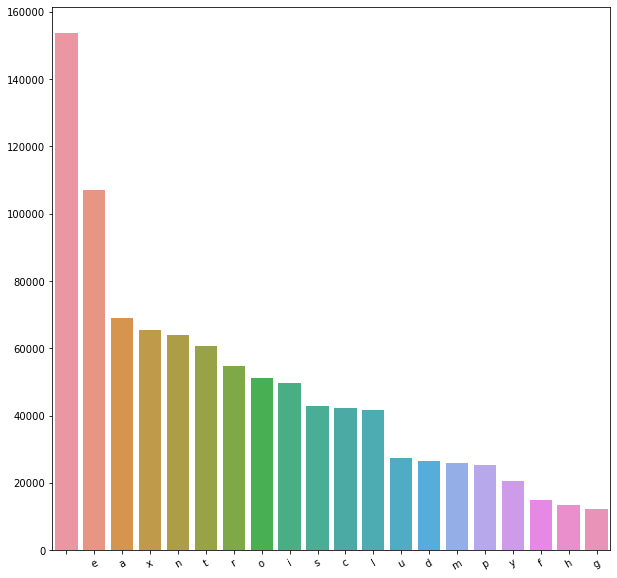

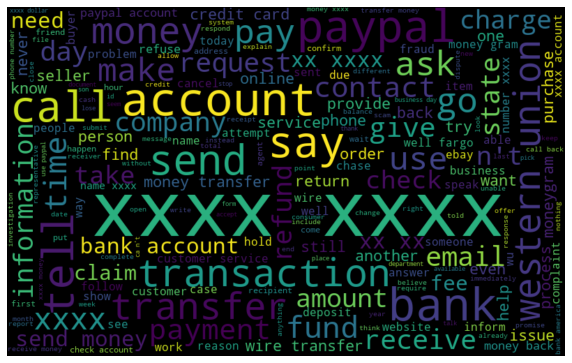

Payday loan


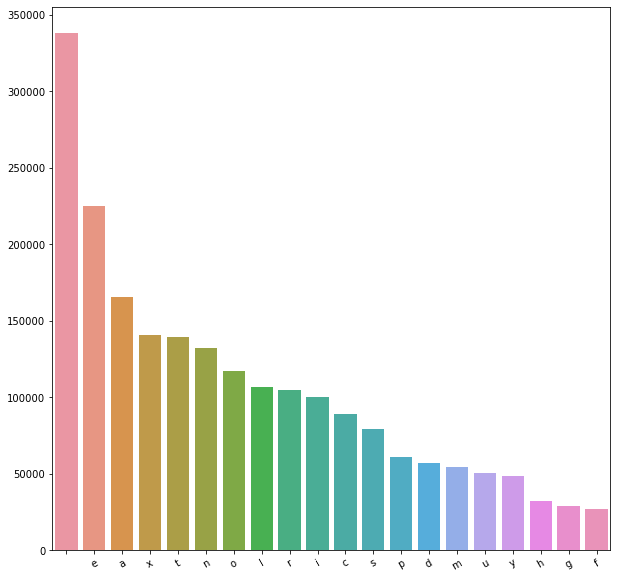

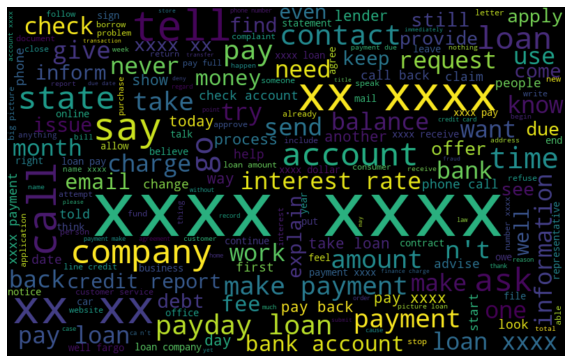

Prepaid card


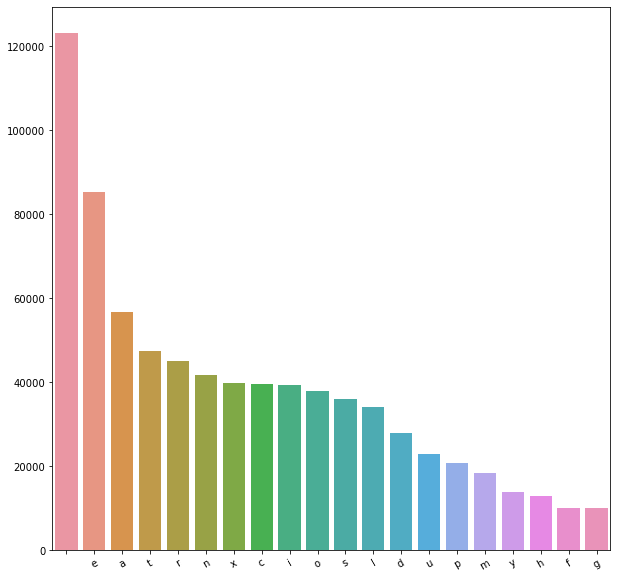

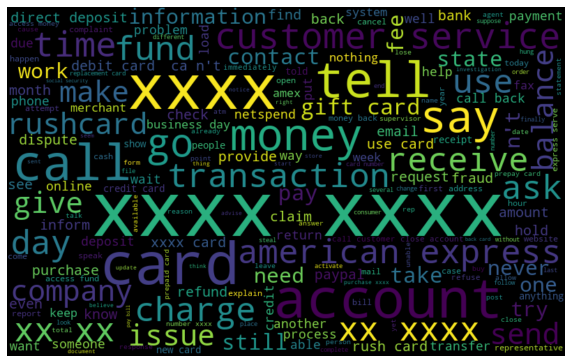

Money transfer, virtual currency, or money service


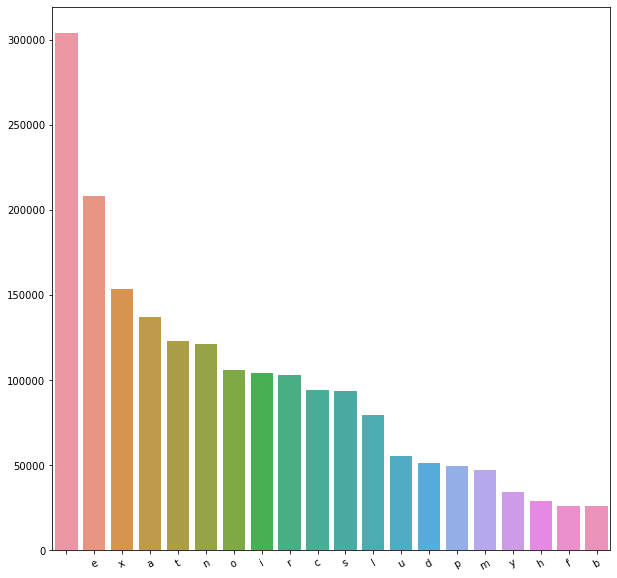

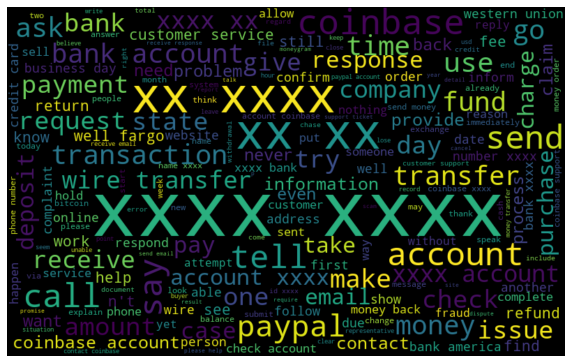

Credit reporting, credit repair services, or other personal consumer reports


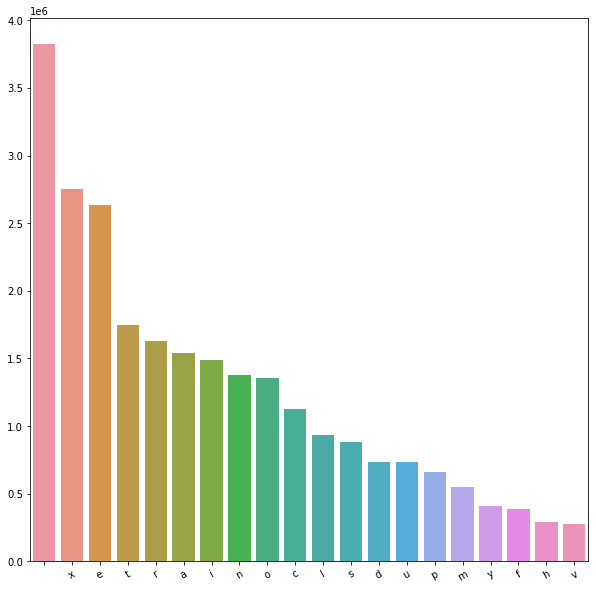

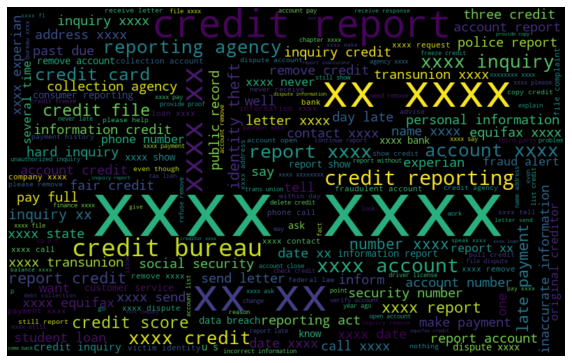

Checking or savings account


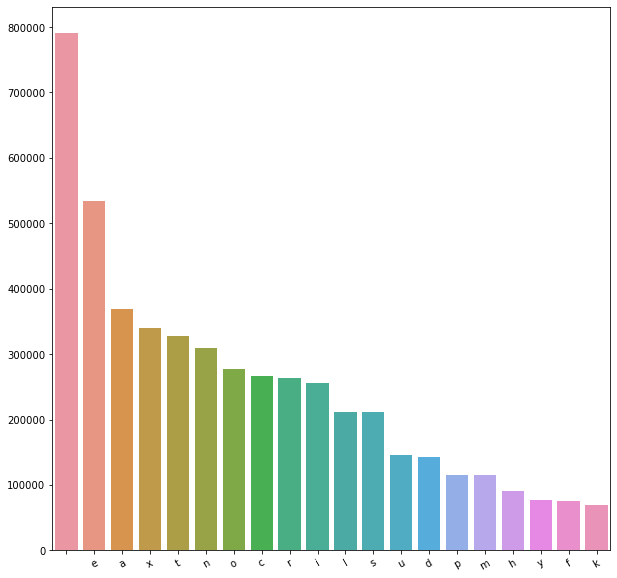

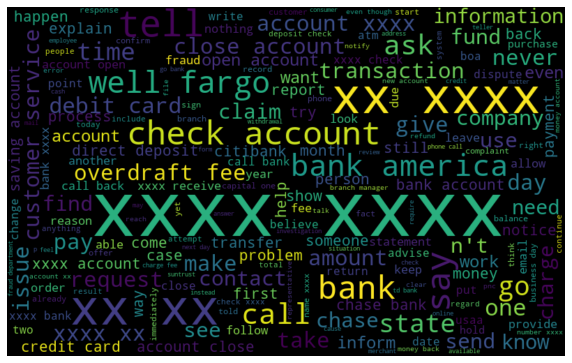

Vehicle loan or lease


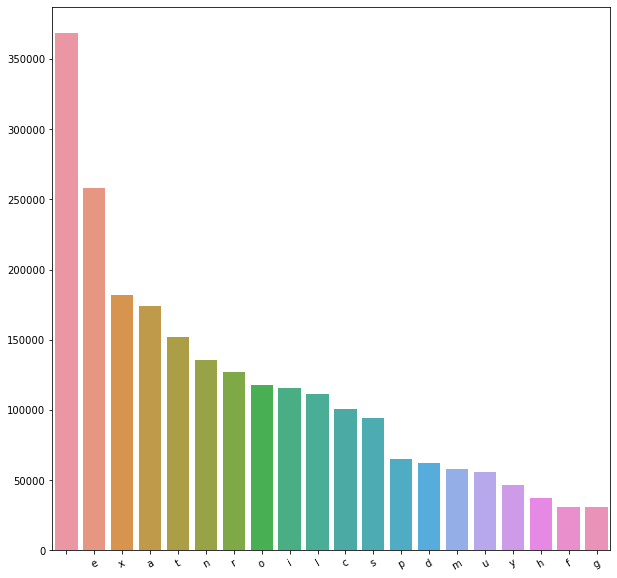

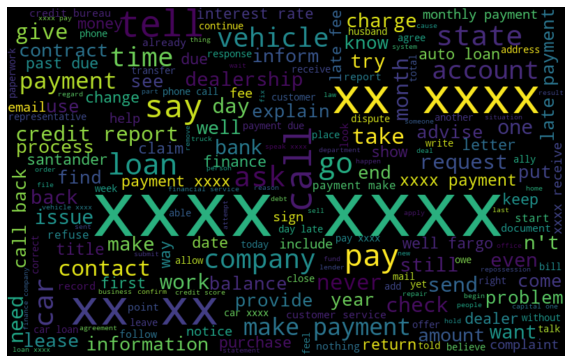

Credit card or prepaid card


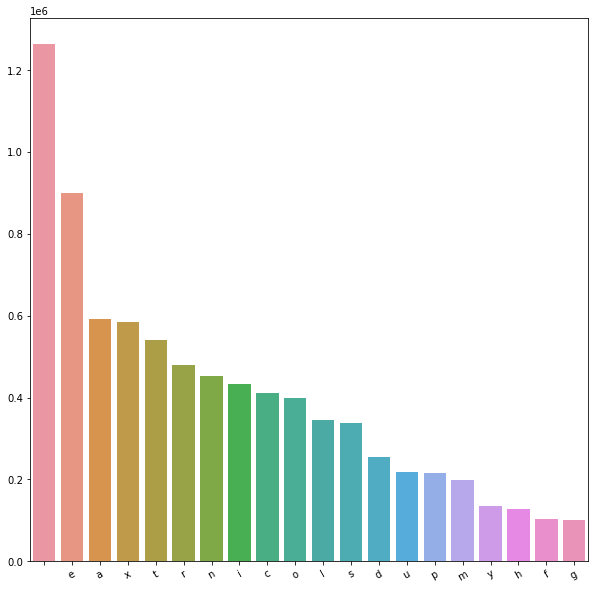

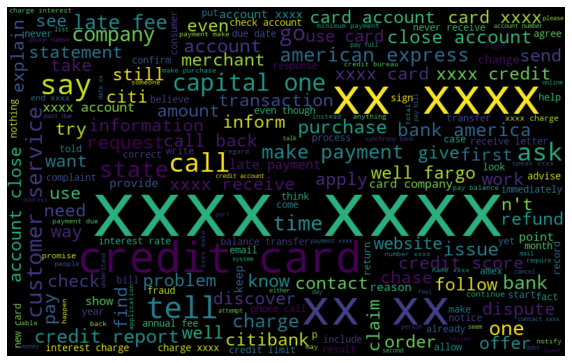

Virtual currency


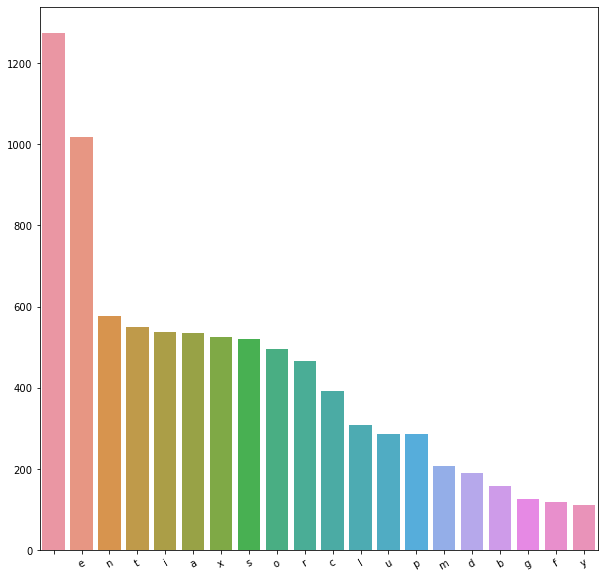

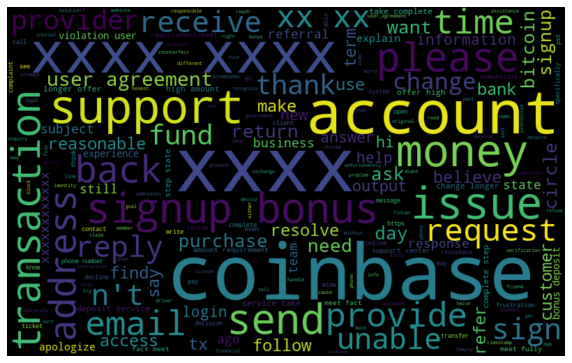

Payday loan, title loan, or personal loan


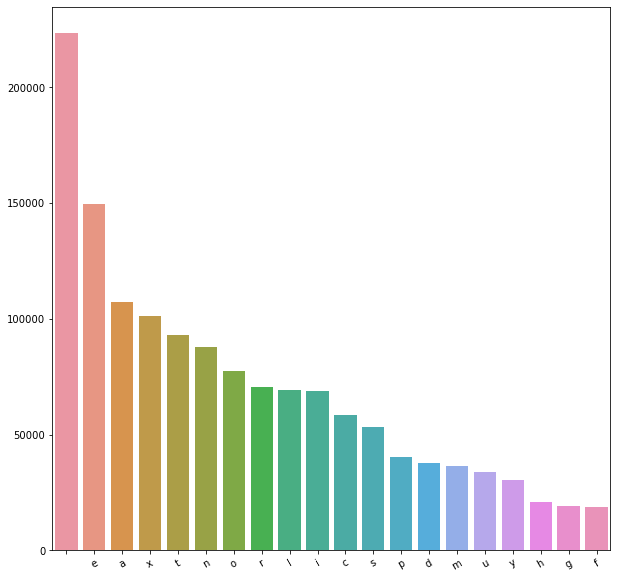

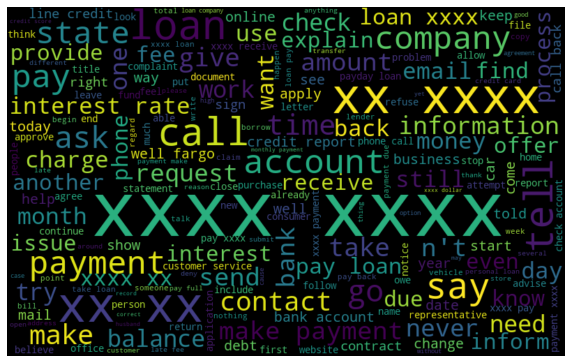

In [19]:
d1 = {}
for product_name in df['Product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df.loc[df['Product'].str.contains(product_name),'Consumer Complaint']])
    #all_words = generate_word_cloud_per_product(product_name,df)
    
    d1[product_name]= all_words
    
    #graph most frequent words
    #creating FreqDist for whole BoW, keeping the 20 most common tokens
    all_fdist = FreqDist(all_words).most_common(20)
    
    #conversion to Pandas series via Python Dictionary for easier plotting
    all_fdist = pd.Series(dict(all_fdist))

    #setting figure, ax into variables
    fig, ax = plt.subplots(figsize=(10,10))

    #seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=30)
    plt.show()
    
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Word Cloud is a data visualization technique in which words from a given text display on the main chart. In this technique, more frequent or essential words display in a larger and bolder font, While less frequent or essential words display in smaller or thinner fonts.

## Split data into training and testing

In [20]:
X=df['Consumer Complaint']
y=df['Product']

In [21]:
#splitting the data
#This stratify parameter makes a split so that the proportion of values in the sample produced 
#will be the same as the proportion of values provided to parameter stratify.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=0,stratify=y)

In [22]:
print('Shape of training data', (X_train.shape,y_train.shape))

Shape of training data ((186135,), (186135,))


In [23]:
print('Shape of testing data', (X_test.shape,y_test.shape))

Shape of testing data ((91679,), (91679,))


## Create TF-IDF Matrix

In [24]:
# encode the target column to convert from categorical to machine learning format
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [25]:
#word embedding using term frequency - inverse document frequency TFIDF
#create the transform
tfidf_vector = TfidfVectorizer(analyzer='word',
                           token_pattern=r'\w{1,}',
                           max_features=5000)



In [26]:
#tokenize and build vocab
tfidf_vector.fit(df['Consumer Complaint'])


TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')

In [27]:
#encode document
xtrain_tfidf = tfidf_vector.transform(X_train)
#summarize encoded vector
print(xtrain_tfidf.shape)
print(type(xtrain_tfidf))
print(xtrain_tfidf.toarray())

(186135, 5000)
<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
#summarize encoded vector
xtest_tfidf = tfidf_vector.transform(X_test)
print(xtest_tfidf.shape)
print(type(xtest_tfidf))
print(xtest_tfidf.toarray())

(91679, 5000)
<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03507489 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Model Building

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [30]:
#define the models
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
svm = LinearSVC()
nb =  MultinomialNB()

In [31]:
#fit the models
lr.fit(xtrain_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [32]:
svm.fit(xtrain_tfidf,y_train)

LinearSVC()

In [33]:
nb.fit(xtrain_tfidf,y_train)

MultinomialNB()

In [34]:
#make the predictions
y_preds_lr = lr.predict(xtest_tfidf)
y_preds_svm = svm.predict(xtest_tfidf)
y_preds_nb = nb.predict(xtest_tfidf)

## Model results evaluation

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

def model_metrics(model_name, y_preds,y_test):
    print("Model:",model_name)
    acc = metrics.accuracy_score(y_preds, y_test)
    print("Accuracy: ",acc)
    print("\nConfusion matrix:")
    cm = metrics.confusion_matrix(y_test, y_preds)
    plt.figure(figsize=(20,20))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}%'.format(np.round(acc,2)*100)
    plt.title(all_sample_title, size = 12)
    plt.show()
    print("\nClassification Report:")
    print(metrics.classification_report(y_test,y_preds,zero_division=1))
    
    print("\nROC-AUC:")
    fpr, tpr, thresholds = roc_curve(y_test, y_preds, pos_label = 1)
    roc_auc = auc(fpr, tpr)
    plt.figure(1, figsize = (15, 10))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    pass
    

Model: Logistic Regression
Accuracy:  0.7255969196871693

Confusion matrix:


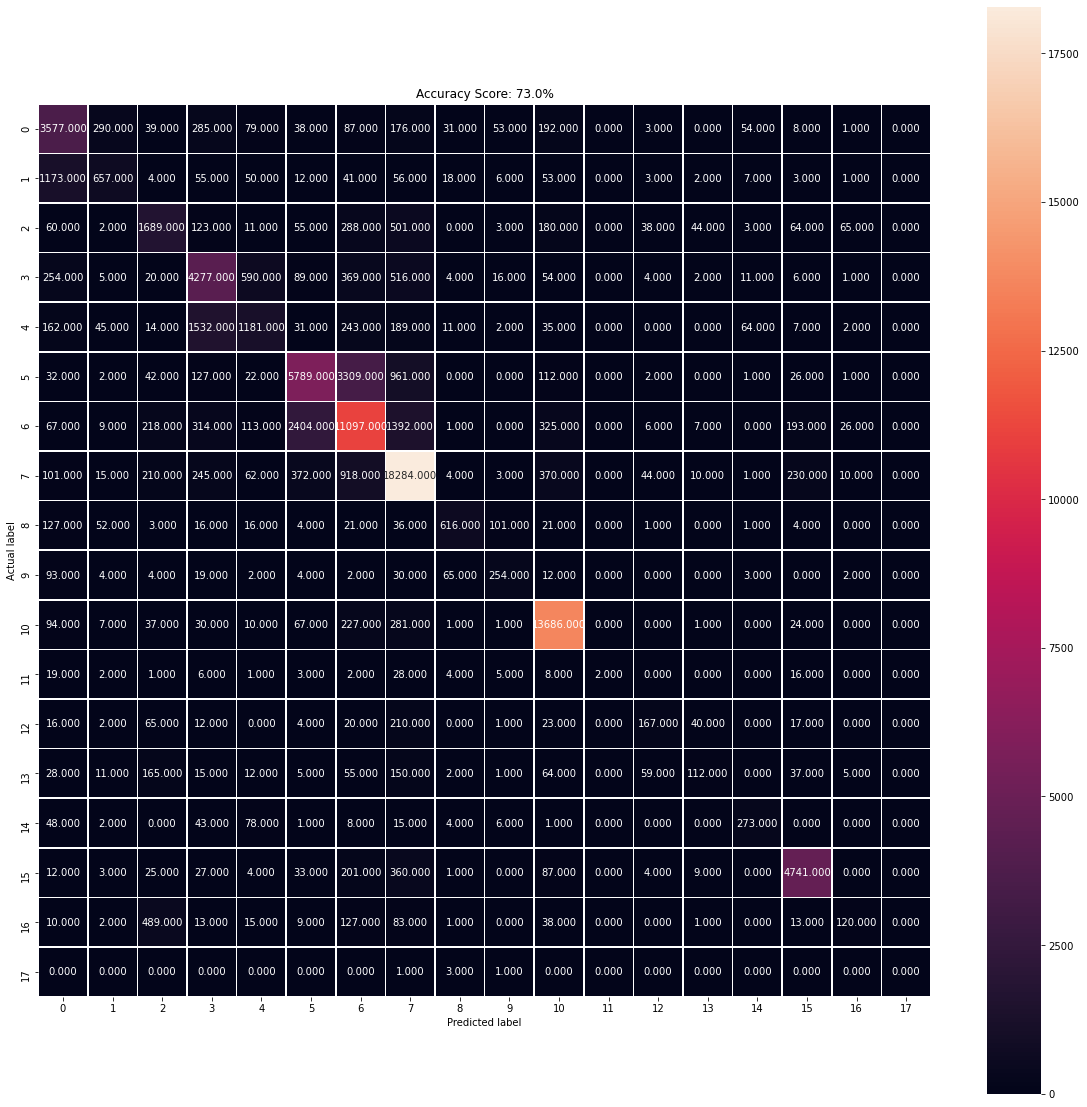


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66      4913
           1       0.59      0.31      0.40      2141
           2       0.56      0.54      0.55      3126
           3       0.60      0.69      0.64      6218
           4       0.53      0.34      0.41      3518
           5       0.65      0.56      0.60     10426
           6       0.65      0.69      0.67     16172
           7       0.79      0.88      0.83     20879
           8       0.80      0.60      0.69      1019
           9       0.56      0.51      0.54       494
          10       0.90      0.95      0.92     14466
          11       1.00      0.02      0.04        97
          12       0.50      0.29      0.37       577
          13       0.49      0.16      0.24       721
          14       0.65      0.57      0.61       479
          15       0.88      0.86      0.87      5507
          16       0.51      0.13      0.21       921
   

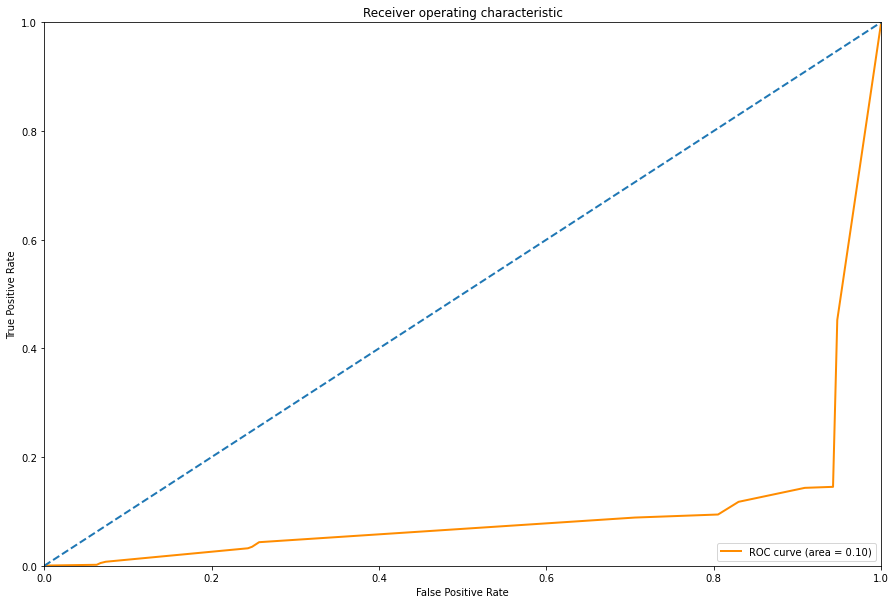

In [36]:
model_name='Logistic Regression'
model_metrics(model_name,y_preds_lr, y_test)

Model: SVM
Accuracy:  0.7189868999443711

Confusion matrix:


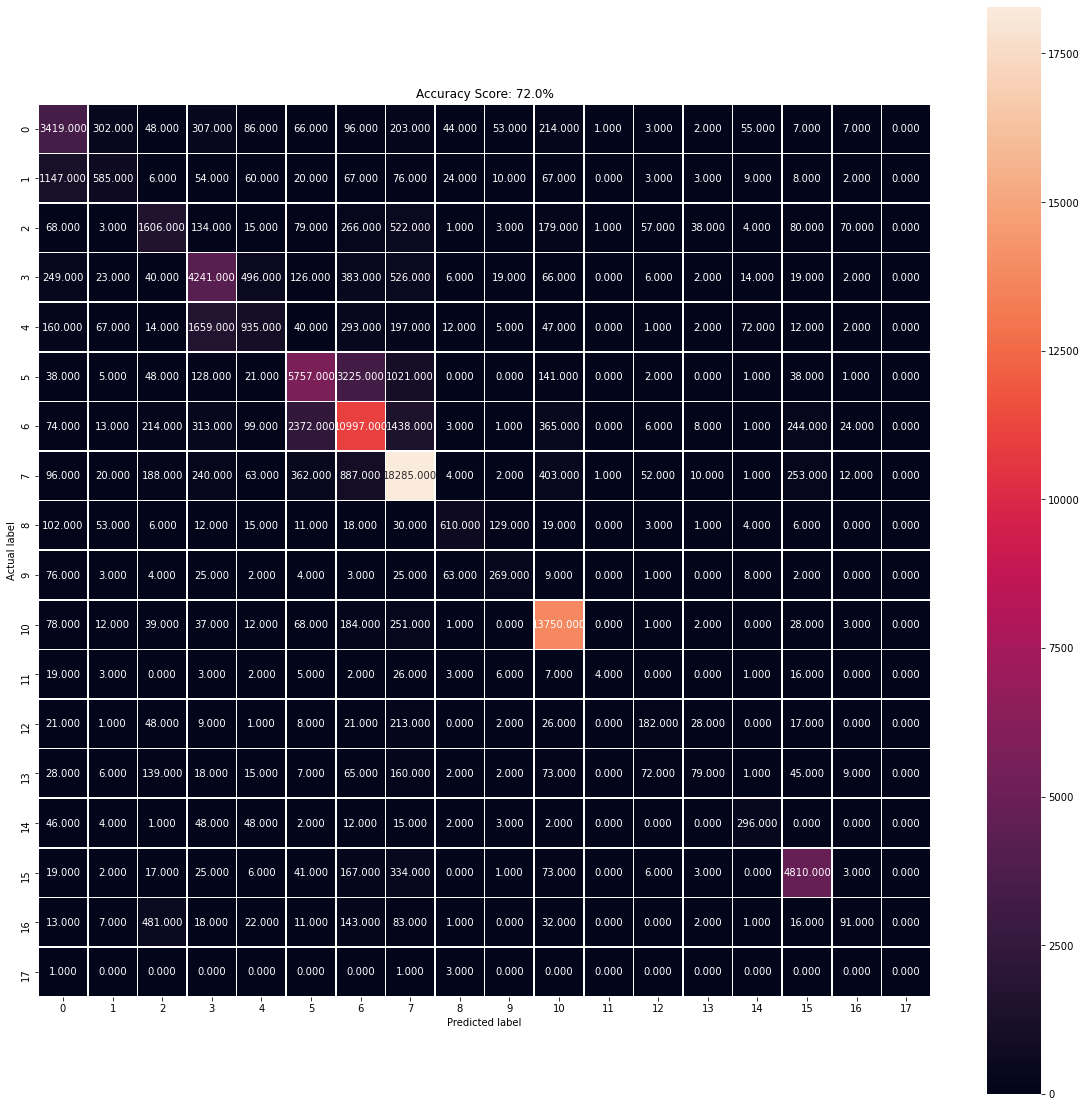


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      4913
           1       0.53      0.27      0.36      2141
           2       0.55      0.51      0.53      3126
           3       0.58      0.68      0.63      6218
           4       0.49      0.27      0.35      3518
           5       0.64      0.55      0.59     10426
           6       0.65      0.68      0.67     16172
           7       0.78      0.88      0.83     20879
           8       0.78      0.60      0.68      1019
           9       0.53      0.54      0.54       494
          10       0.89      0.95      0.92     14466
          11       0.57      0.04      0.08        97
          12       0.46      0.32      0.37       577
          13       0.44      0.11      0.18       721
          14       0.63      0.62      0.63       479
          15       0.86      0.87      0.87      5507
          16       0.40      0.10      0.16       921
   

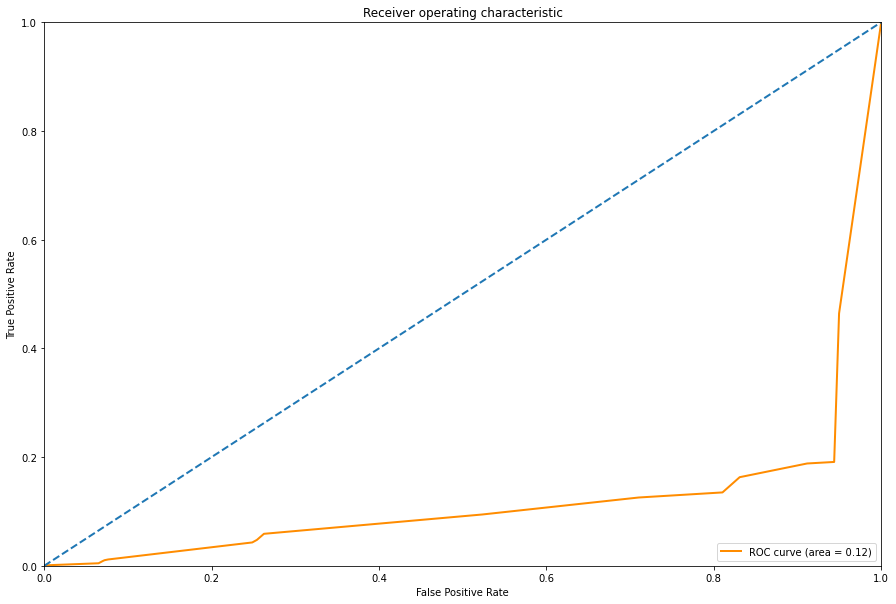

In [37]:
model_name='SVM'
model_metrics(model_name,y_preds_svm, y_test)

Model: NB
Accuracy:  0.6755309285659747

Confusion matrix:


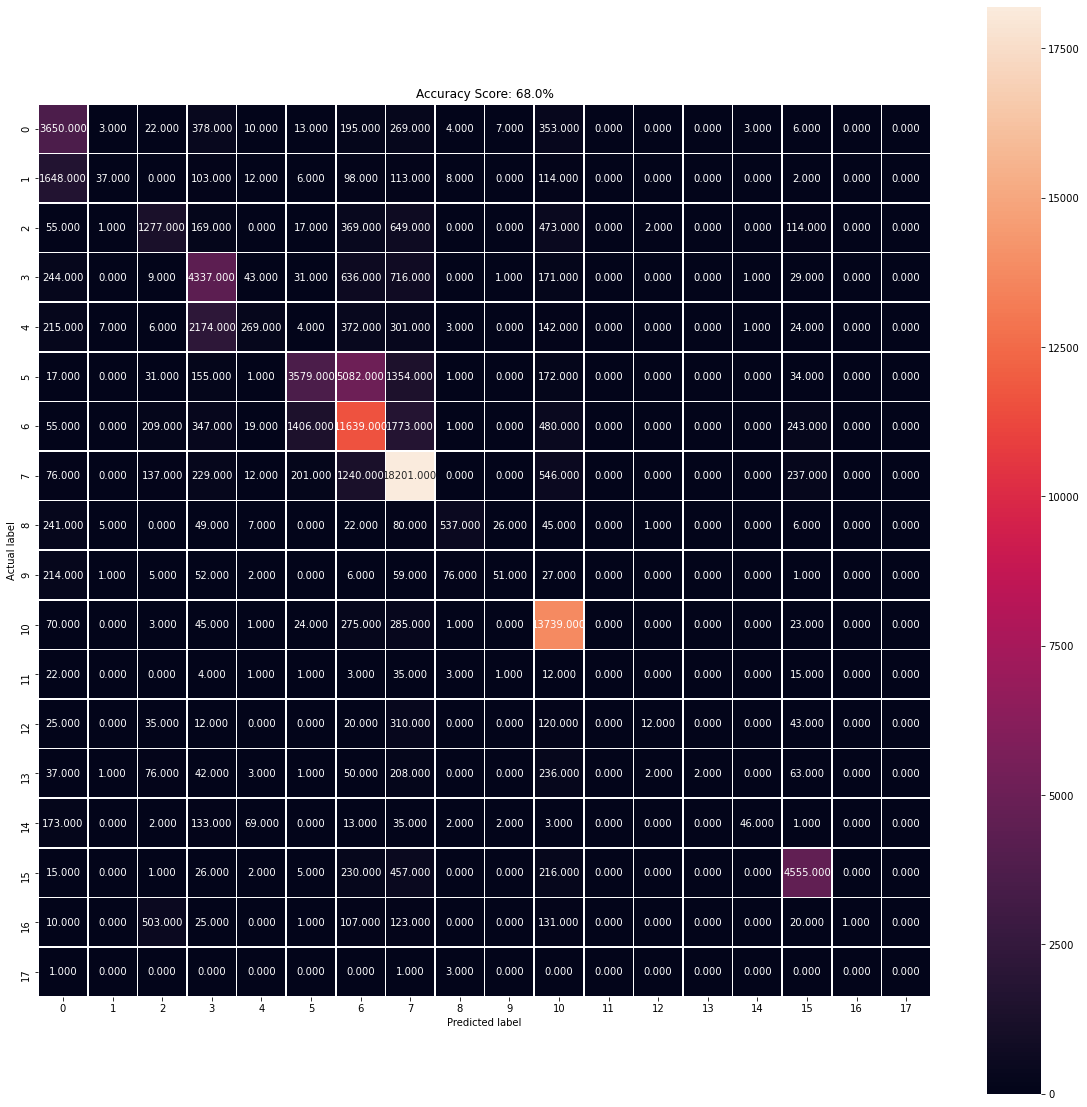


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.74      0.62      4913
           1       0.67      0.02      0.03      2141
           2       0.55      0.41      0.47      3126
           3       0.52      0.70      0.60      6218
           4       0.60      0.08      0.14      3518
           5       0.68      0.34      0.46     10426
           6       0.57      0.72      0.64     16172
           7       0.73      0.87      0.79     20879
           8       0.84      0.53      0.65      1019
           9       0.58      0.10      0.18       494
          10       0.81      0.95      0.87     14466
          11       1.00      0.00      0.00        97
          12       0.71      0.02      0.04       577
          13       1.00      0.00      0.01       721
          14       0.90      0.10      0.17       479
          15       0.84      0.83      0.83      5507
          16       1.00      0.00      0.00       921
   

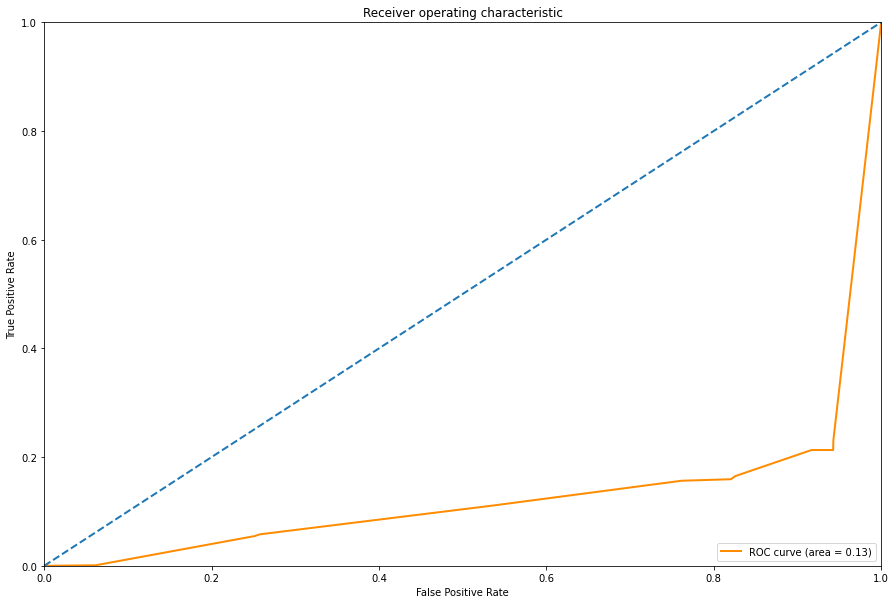

In [38]:
model_name='NB'
model_metrics(model_name,y_preds_nb, y_test)

The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of a classifier. The closer the curve is to the diagonal baseline, the better the predictions. 

Based on the AUC ROC (Area Under the Curve ROC), the NB model is very good.

Based on the accuracy levels, the Logistic Regression is the best model for our classification problem.

## Make a test prediction

In [39]:
complaint = ["I am writing to your company about a problem with my Hoverbike, a 2012 Skylark model. I began to have trouble staying aloft a few months ago, and this week the height control module completely failed. While the bicycle is a few months out of warranty, I believe that this occurred because of a design flaw in the Skylark, and I am asking that your company cover or share with me the cost of the required repair."]

text_features = tfidf_vector.transform(complaint)
predictions = lr.predict(text_features)
print('\nComplaint:',complaint)
print('\nPredicted Category: {}'.format(df.loc[df['Category_id']==predictions[0],'Product'].iloc[0]))


Complaint: ['I am writing to your company about a problem with my Hoverbike, a 2012 Skylark model. I began to have trouble staying aloft a few months ago, and this week the height control module completely failed. While the bicycle is a few months out of warranty, I believe that this occurred because of a design flaw in the Skylark, and I am asking that your company cover or share with me the cost of the required repair.']

Predicted Category: Student loan


## Conclusion

The best complaints analyzer that categorizes them, we built was the logistic regression model with an overall accuracy of 73%.